In [1]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..'))
from openparticle import *
import numpy as np
import cirq
from src.lobe.system import System
from src.lobe.lobe_circuit import lobe_circuit
from src.lobe.block_encoding import add_lobe_oracle
from cirq.contrib.svg import SVGCircuit
from src.lobe.usp import add_naive_usp
from src.lobe.rescale import rescale_terms, get_numbers_of_bosonic_operators_in_terms
from src.lobe._utils import get_basis_of_full_system
import matplotlib.pyplot as plt

/Users/carterm.gustin/anaconda3/envs/phd/lib/python3.9/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


\begin{equation}
H = \sum_n^{\Lambda_{f}} b_n^\dagger b_n + \sum_n^{\Lambda_{af}} d_n^\dagger d_n + \sum_n^{\Lambda_{b}} a_n^\dagger a_n + \sum_{i,j,k,l}^{\Lambda_b} a_i^\dagger a_j^\dagger a_k a_l + \sum_{i,j,k}^{\Lambda_f, \Lambda_{af}, \Lambda_b} \left(b_i^\dagger d_j^\dagger a_k + b_i d_j a_k^\dagger \right)
\end{equation}

In [2]:
Lambda_f = Lambda_af = 2
Lambda_b = 2
max_occ = 3

In [3]:
Hfree = (
    ParticleOperator('b0^ b0')
    + ParticleOperator('b1^ b1')
    + ParticleOperator('d0^ d0')
    + ParticleOperator('d1^ d1')
    + ParticleOperator('a0^ a0')
    + ParticleOperator('a1^ a1')
)


In [4]:
H_four_pt_gluon = ParticleOperator({})

for i in range(Lambda_b):
    for j in range(Lambda_b):
        for k in range(Lambda_b):
            for l in range(Lambda_b):
                four_pt_str = 'a' + str(i) + '^ ' + 'a' + str(j) + '^ ' + 'a' + str(k) + ' a' + str(l)
                H_four_pt_gluon += ParticleOperator(four_pt_str)

In [5]:
H_pair_production = ParticleOperator({})
H_pair_annihilation = ParticleOperator({})

for i in range(Lambda_f ):
    for j in range(Lambda_af ):
        for k in range(Lambda_b ):
            production_str = 'b' + str(i) + "^ " + 'd' + str(j) + "^ " + 'a' + str(k)
            annihilation_str = 'b' + str(i) + ' d' + str(j) + ' a' + str(k) + "^"
            H_pair_production += ParticleOperator(production_str)
            H_pair_annihilation += ParticleOperator(annihilation_str)

In [6]:
hamiltonian = Hfree + H_pair_annihilation + H_pair_production #+ H_four_pt_gluon

In [7]:
hamiltonian.display()

<IPython.core.display.Latex object>

In [8]:
len(hamiltonian)

22

In [9]:
basis = get_fock_basis(hamiltonian, max_occ)

In [10]:
ham_matrix = generate_matrix(hamiltonian, basis)

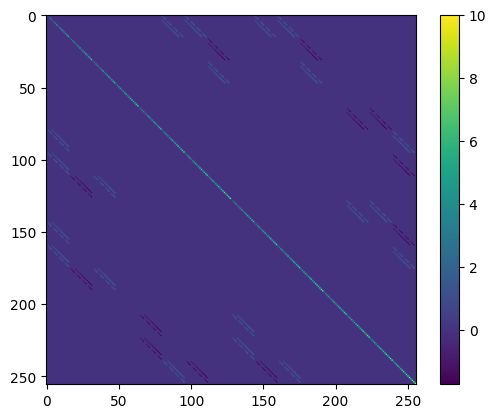

In [11]:
plt.imshow(ham_matrix)
plt.colorbar()

In [12]:
circuit, unitary, matrix = lobe_circuit(hamiltonian, max_occ, return_unitary=False)

In [13]:
SVGCircuit(circuit)

In [14]:
Lambda_f = 2

In [15]:
Hpair = ParticleOperator({})
Htwo_body = ParticleOperator({})

for i in range(Lambda_f):
    for j in range(Lambda_f):
        pair_str = 'b' + str(i) + '^ ' + 'b' + str(j)
        Hpair += ParticleOperator(pair_str)
        for k in range(Lambda_f):
            for l in range(Lambda_f):
                if i < j and l < k:
                    two_body_str = 'b' + str(i) + '^ ' + 'b' + str(j) + '^ ' + 'b' + str(k) + ' b' + str(l)
                    Htwo_body += ParticleOperator(two_body_str)

In [16]:
H = Hpair + Htwo_body

circuit, _, _ = lobe_circuit(H)

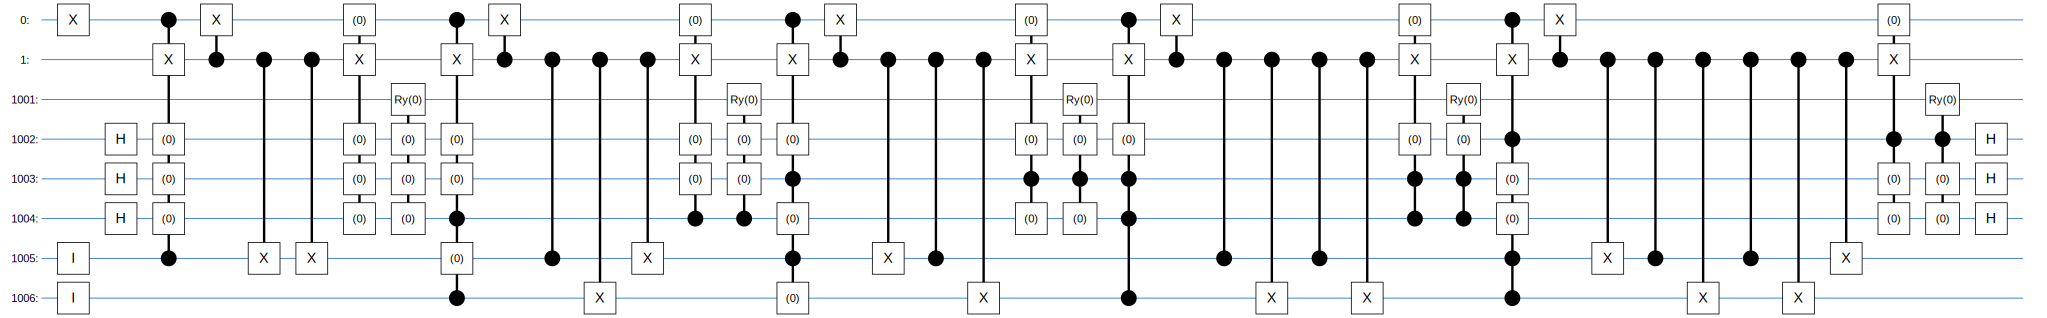

In [17]:
SVGCircuit(circuit)

In [2]:
H = 1/48 * ParticleOperator('a0^ a0^ b0^ d0') + 1/24 * ParticleOperator('a0^ a0 d0^') + 1/16 * ParticleOperator('b0^ d0^ d0')

In [5]:
circuit, _, _ = lobe_circuit(H, max_bose_occ=3,decompose=True, return_numerics=True)

{'left_elbows': 21, 'right_elbows': 18, 'rotations': 18, 'ancillae_tracker': [0, 2, 5, 3, 4, 3, 4, 3, 4, 3, 2, 4, 3, 4, 3, 2, 3, 4, 3, 2, 5, 3, 4, 3, 2], 'angles': [-0.16240570822686246, 0.047378980145554486, 0.047378980145554486, -0.16240570822686246, -0.3613671239067079, 0.3613671239067079, -1.2309594173407747, 1.2309594173407747, -0.2585219168796085, 0.09185525021294179, -0.011424626957775533, 0.17809129362444226, 0.0, -0.0, -0.8410686705679303, 0.8410686705679303, -1.318116071652818, 1.318116071652818]}


$C_{U_{T_0}} = (8, 7, 8)$
$C_{U_{T_0}} = (7, 6, 8)$
$C_{U_{T_0}} = (4, 3, 2)$
$C_{\text{SELECT}} = (19, 16, 18)$

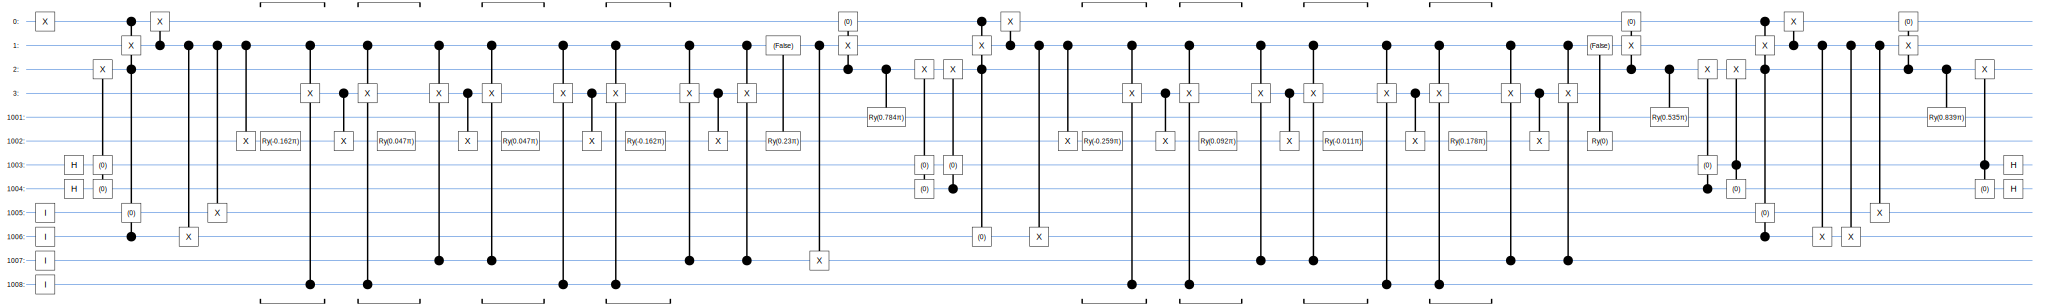

In [6]:
SVGCircuit(circuit)

# Quartic Oscillator

In [7]:
renormalized_quartic_oscillator_hamiltonian = ParticleOperator({
    'a0^ a0^ a0^ a0': 2.849565686667622,
    'a0^ a0^': 3.5923247590513974,
    'a0^ a0^ a0 a0': -5.536050711865201,
    'a0^ a0': 11.737092068070014,
    'a0^ a0 a0 a0': 2.849565686667622,
    #' ': 2.4780255664185606, # remove identity term
    'a0 a0': 3.5923247590513974,
    'a0^ a0^ a0^ a0 a0 a0': 3.9998612759007717,
    'a0^ a0^ a0 a0 a0 a0': 3.5581095542809806,
})

In [8]:
maximum_occupation_number = 3

In [11]:
circuit, unitary, _ = lobe_circuit(renormalized_quartic_oscillator_hamiltonian, max_bose_occ=maximum_occupation_number, decompose=True, return_numerics=True)

{'left_elbows': 53, 'right_elbows': 45, 'rotations': 64, 'ancillae_tracker': [0, 3, 4, 4, 5, 4, 5, 4, 5, 4, 3, 4, 4, 5, 4, 5, 4, 5, 4, 3, 4, 4, 5, 4, 3, 4, 5, 4, 3, 4, 4, 5, 4, 3, 4, 5, 4, 3, 4, 4, 5, 4, 5, 4, 5, 4, 3, 4, 4, 5, 4, 5, 4, 5, 4, 3, 4, 4, 5, 4, 3, 4, 5, 4, 3, 4, 4, 5, 4, 5, 4, 5, 4, 3], 'angles': [-0.024461720931042197, 0.024461720931042197, 0.024461720931042197, -0.024461720931042197, 0.0, -0.0, -1.5100632636750717, 1.5100632636750717, -0.16240570822686246, 0.047378980145554486, 0.047378980145554486, -0.16240570822686246, -0.3613671239067079, 0.3613671239067079, -1.551666035299702, 1.551666035299702, -0.08112519060694569, 0.04123210293217745, -0.04123210293217745, 0.08112519060694569, 0.0, -0.0, -1.452603484140617, 1.452603484140617, -0.2585219168796085, 0.09185525021294179, -0.011424626957775533, 0.17809129362444226, 0.0, -0.0, -1.508255564998405, 1.508255564998405, -0.024461720931042197, 0.024461720931042197, -0.024461720931042197, 0.024461720931042197, 0.0, -0.0, -1.51

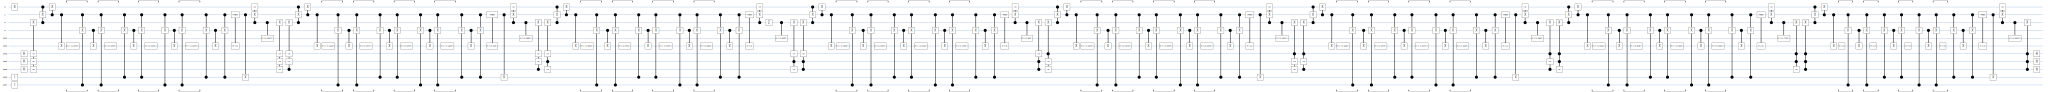

In [12]:
SVGCircuit(circuit)

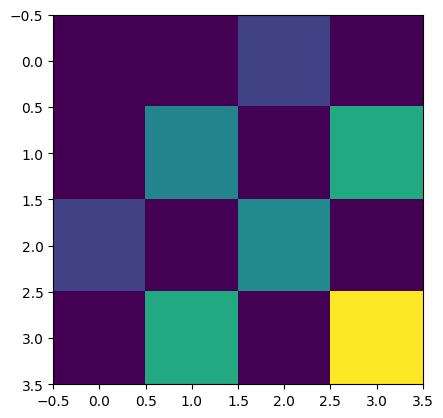

In [13]:
plt.imshow(np.real(unitary))

In [14]:
g = 1.0

In [15]:
Hfull = ParticleOperator('a0^ a0') + g * (ParticleOperator('a0^') + ParticleOperator('a0'))**4

In [24]:
Hfull = Hfull.normal_order()

In [36]:
Hfull = ParticleOperator({'a0^ a0^ a0^ a0^': 1.0,
 'a0^ a0^ a0^ a0': 4.0,
 'a0^ a0^': 6.0,
 'a0^ a0^ a0 a0': 6.0,
 'a0^ a0': 13.0,
 'a0^ a0 a0 a0': 4.0,
#  ' ': 3.0,
 'a0 a0': 6.0,
 'a0 a0 a0 a0': 1.0})

In [41]:
circuit, _, _ = lobe_circuit(Hfull, max_bose_occ=200, return_unitary=False, return_numerics=True)

{'left_elbows': 2120, 'right_elbows': 2112, 'rotations': 2080, 'ancillae_tracker': [0, 3, 6, 4, 5, 4, 15, 4, 5, 4, 3, 6, 4, 5, 4, 17, 4, 5, 4, 3, 6, 4, 5, 4, 17, 4, 5, 4, 3, 6, 4, 5, 4, 3, 4, 5, 4, 3, 6, 4, 5, 4, 3, 4, 5, 4, 3, 6, 4, 5, 4, 17, 4, 5, 4, 3, 6, 4, 5, 4, 17, 4, 5, 4, 3, 6, 4, 5, 4, 15, 4, 5, 4, 3], 'angles': [-0.22999425208745047, 0.0017316957079872852, -5.168719300260166e-05, 0.0034582306191336468, 0.00019175177649496944, -1.5927082943928417e-05, 9.758584345697513e-05, -0.0068867677269112484, 0.013633156868185, -0.00017463976653671331, 2.320787881011162e-05, -0.00034498673909660643, -7.790344514945553e-05, 1.2320307650902926e-05, -4.052818945415458e-05, 0.0006668609418416652, 0.011531614419760326, -5.9374828360575505e-05, -8.194647166655331e-06, -0.00012167269870787213, 0.0003611217189417857, -2.4093088826220455e-05, 0.0001827446719357747, -0.014030552582175825, 0.013001868676041941, -0.00014839556227179158, 1.8128026253011985e-05, -0.0002932427711568467, -0.0003984915088

In [42]:
SVGCircuit(circuit)


In [32]:
#11111011 -> int
int('11111011', 2)

251

In [33]:
#196
format(196, "08b")

'11000100'